# German Credit Data Analysis



In [30]:
import pandas as pd
import numpy as np

# importing packages for viz
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go


In [31]:
# importing package to handle warnings
import warnings
warnings.filterwarnings("ignore")

# Import required csv file from (https://www.kaggle.com/datasets/kabure/german-credit-data-with-risk)

data = pd.read_csv ('german_credit_data.csv')
data.drop(data.columns[0], inplace=True, axis=1)
data.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,NaN,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad


In [32]:
##descriptive measures before data cleaning
data.describe()

,Age,Job,Credit amount,Duration
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,35.546000,1.904000,3271.258000,20.903000
std,11.375469,0.653614,2822.736876,12.058814
min,19.000000,0.000000,250.000000,4.000000
25%,27.000000,2.000000,1365.500000,12.000000
50%,33.000000,2.000000,2319.500000,18.000000
75%,42.000000,2.000000,3972.250000,24.000000
max,75.000000,3.000000,18424.000000,72.000000


In [33]:
### removing Upper case letters

data.columns = [x.lower().replace(" ","_") for x in data.columns]
data.columns

Index(['age', 'sex', 'job', 'housing', 'saving_accounts', 'checking_account',
       'credit_amount', 'duration', 'purpose', 'risk'],
      dtype='object')

In [34]:
### Risk Distribution

fig = px.histogram(data, x='risk', color='risk', title='Credit Risk')
fig.update_layout(xaxis_title='Risk', yaxis_title='Total Count')
fig.show()

In [35]:
## checking for missing values


print("Missing values in each column:\n{}".format(data.isnull().sum()))


Missing values in each column:
age                   0
sex                   0
job                   0
housing               0
saving_accounts     183
checking_account    394
credit_amount         0
duration              0
purpose               0
risk                  0
dtype: int64


In [36]:
print("Unique values in each categorical column:")
for col in data.select_dtypes(include=[object]):
    print(col,":", data[col].unique())

Unique values in each categorical column:
sex : ['male' 'female']
housing : ['own' 'free' 'rent']
saving_accounts : [nan 'little' 'quite rich' 'rich' 'moderate']
checking_account : ['little' 'moderate' nan 'rich']
purpose : ['radio/TV' 'education' 'furniture/equipment' 'car' 'business'
 'domestic appliances' 'repairs' 'vacation/others']
risk : ['good' 'bad']


In [38]:
## All categorical variable Levels risk distribution


factors = ['sex', 'housing', 'saving_accounts', 'checking_account', 'purpose','duration']

def visualize_factors(data, col_list, hue='risk'):
    for col in col_list:
        fig = px.histogram(data, x=col, color=hue, title=f'{col} distribution by Credit Risk')
        fig.show()

visualize_factors(data, factors)


31 percent are female, and 69 percent are male. For females, 35 percent are at high risk; on the contrary, approximately 27 percent of males are at high risk.

Sex Distribution by Credit Risk

From the total records, approximately 70 percent are from the own housing category, approximately 20 percent from the rent housing category, and approximately 10 percent from the free housing category. Free and rent housing category levels have approximately 40 percent each of bad risk instances, while the own housing category has 20 percent of bad risk instances.

Housing Distribution by Credit risk

approximately 60 percent are from the little saving account category, approximately 10 percent from the moderate saving account category, and approximately 10 percent from the rich and quite rich category. The little and moderate saving account categories have approximately 35 percent each of bad risk instances, while the quite rich’ saving account category has approximately 17 percent of bad risk instances. The rich saving account category has approximately 12 percent bad-risk instances, which is the minimum across all categories.

Savings Account distribution by credit Risk


Approximately 27 percent are from the little checking account category, approximately 26 percent from the moderate checking account category, and approximately 6 percent from the rich checking account category. The little and moderate checking account category levels have approximately 50 and 40 percent bad-risk instances, respectively. The rich checking account category has approximately 20 percent of bad-risk instances, which is the minimum across all three categories.

Checking Account Distribution by Credit risk

approximately 33 percent are from the car category, approximately 28 percent from the radio and TV category, and approximately 18 percent from the furniture and equipment category. Car purpose category levels have approximately 31 percent bad risk instances, while furniture and equipment purpose categories have approximately 32 percent bad risk instances. The radio/purpose category has approximately 22 percent bad-risk instances, which is the minimum across all categories.
In German credit data, various categorical variables can be encoded using label encoding. We can convert the categorical variables in the German credit data into numerical representations that work with machine learning methods by applying label encoding to them.


In [39]:
fig = px.histogram(data, x='credit_amount', nbins=20,
                   color='risk', marginal='box',
                   title='Histogram and Boxplot of credit Amount ')
fig.show()

## Replacing missing values

In [40]:

# The saving_account column we will replace nan with word "non_exc"
data['saving_accounts'] = data['saving_accounts'].fillna('non_exc')


## in checking account column replacing na with mode
data["checking_account"].fillna(data['checking_account'].mode()[0], inplace=True)
print("Missing values in each column:\n{}".format(data.isnull().sum()))


Missing values in each column:
age                 0
sex                 0
job                 0
housing             0
saving_accounts     0
checking_account    0
credit_amount       0
duration            0
purpose             0
risk                0
dtype: int64


In [41]:
## Clean data Look

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   age               1000 non-null   int64 
 1   sex               1000 non-null   object
 2   job               1000 non-null   int64 
 3   housing           1000 non-null   object
 4   saving_accounts   1000 non-null   object
 5   checking_account  1000 non-null   object
 6   credit_amount     1000 non-null   int64 
 7   duration          1000 non-null   int64 
 8   purpose           1000 non-null   object
 9   risk              1000 non-null   object
dtypes: int64(4), object(6)
memory usage: 78.2+ KB


In [42]:
## importing required packages for model preparation training and validation
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder

In [43]:
## applying encoding to categorical variable
columns_to_encode = ['sex', 'housing',  'purpose', 'risk', 'saving_accounts','checking_account']

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Apply label encoding to each column
for column in columns_to_encode:
    data[column] = label_encoder.fit_transform(data[column])

In [44]:
data.head()

,age,sex,job,housing,saving_accounts,checking_account,credit_amount,duration,purpose,risk
0,67,1,2,1,2,0,1169,6,5,1
1,22,0,2,1,0,1,5951,48,5,0
2,49,1,1,1,0,0,2096,12,3,1
3,45,1,2,0,0,0,7882,42,4,1
4,53,1,2,0,0,0,4870,24,1,0


In [45]:
## importing required packages for scaling the categorical columns
from sklearn.preprocessing import StandardScaler
# intialize the Standard scalar
stdscaler = StandardScaler()
data[['duration', 'credit_amount', 'job', 'age']] = stdscaler.fit_transform(data[['duration', 'credit_amount', 'job', 'age']])

In [46]:
### Descriptive stats for Transformed and scaled data
data.describe()

,age,sex,job,housing,saving_accounts,checking_account,credit_amount,duration,purpose,risk
count,1.000000e+03,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1.000000e+03,1.000000e+03,1000.000000,1000.000000
mean,5.329071e-17,0.690000,5.684342e-17,1.071000,0.850000,0.395000,6.661338e-17,1.136868e-16,2.878000,0.700000
std,1.000500e+00,0.462725,1.000500e+00,0.531264,1.203723,0.604434,1.000500e+00,1.000500e+00,1.978138,0.458487
min,-1.455261e+00,0.000000,-2.914492e+00,0.000000,0.000000,0.000000,-1.070865e+00,-1.402415e+00,0.000000,0.000000
25%,-7.516417e-01,0.000000,1.469492e-01,1.000000,0.000000,0.000000,-6.754833e-01,-7.386675e-01,1.000000,0.000000
50%,-2.239269e-01,1.000000,1.469492e-01,1.000000,0.000000,0.000000,-3.373443e-01,-2.408572e-01,3.000000,1.000000
75%,5.676451e-01,1.000000,1.469492e-01,1.000000,2.000000,1.000000,2.484620e-01,2.569531e-01,5.000000,1.000000
max,3.470076e+00,1.000000,1.677670e+00,2.000000,4.000000,2.000000,5.370789e+00,4.239436e+00,7.000000,1.000000


In [47]:
## Subsetting independent variables or explanatory variable
explanatory_variable = data.drop("risk", axis=1)
### subsetting response variable
response_variable = data["risk"]
X_train, X_val, y_train, y_val = train_test_split(explanatory_variable, response_variable, test_size=0.3, random_state=56)

In [48]:
#explanatory and response variables dimension of training data

print(X_train.shape)
print(y_train.shape)


(700, 9)
(700,)


In [49]:
## importing performance measure packages
from sklearn.metrics import precision_recall_curve, roc_curve, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
## defining function to evalute performance metrics
def metrics(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    roc_auc = roc_auc_score(y_true, y_pred)

    return accuracy, precision, recall, f1, roc_auc

def perf_measures(y_true, y_pred):
    accuracy, precision, recall, f1_score, roc_auc = metrics(y_true, y_pred)
    print("Accuracy: %.3f\nPrecision: %.3f\nRecall: %.3f\nF1 Score: %.3f\nROC AUC: %.3f" % (accuracy, precision, recall, f1_score, roc_auc))

def plot_roc(y_true, probas):
    fpr, tpr, tresholds = roc_curve(y_true, probas)
    plt.plot(fpr, tpr, color="g")
    plt.plot([0, 1], [0, 1], color="black", linestyle="--")
    plt.title("ROC Curve")
    plt.xlabel("False Positive Rate (FPR)")
    plt.ylabel("True Positive Rate (TPR)")
    fig.show()



In [50]:
# importing packages required for logisitc regression hyperparameter tuning

from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV


# define models and parameters
model = LogisticRegression()
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]
# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)
### initializing K fold parameters
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(explanatory_variable, response_variable)
# summarized results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.725667 using {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
0.723667 (0.031883) with: {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
0.723667 (0.031883) with: {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
0.723667 (0.031883) with: {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}
0.723667 (0.031883) with: {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}
0.723667 (0.031883) with: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
0.723667 (0.031883) with: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
0.722333 (0.030842) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'newton-cg'}
0.722333 (0.030842) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'lbfgs'}
0.723333 (0.031340) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'liblinear'}
0.722667 (0.028975) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}
0.722667 (0.028975) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
0.725667 (0.029853) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
0.720000 (0.018074) wit

In [51]:
logistic_model = LogisticRegression(C = 0.1, penalty = 'l2', solver = 'liblinear')
logistic_model.fit(X_train, y_train)


LogisticRegression(C=0.1, solver='liblinear')

Accuracy: 0.723
Precision: 0.731
Recall: 0.947
F1 Score: 0.825
ROC AUC: 0.586


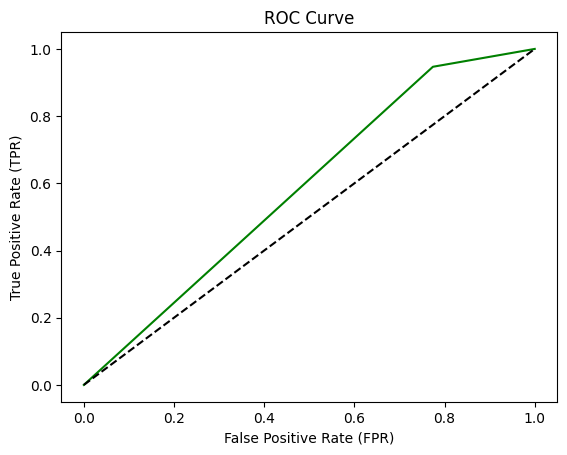

In [52]:
logistic_pred = logistic_model.predict(X_val)
logistic_cm = confusion_matrix(y_val, logistic_pred)
logistic_cm
perf_measures(y_val, logistic_pred)
plot_roc(y_val, logistic_pred)

In [53]:




# Importing necessary packages for decision tree hyperparameter training
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV

# parameters and distribution
param_dist = {"max_depth": [3, None],
              "max_features": randint(1, 9),
              "min_samples_leaf": randint(1, 9),
              "criterion": ["gini", "entropy"]}

# training Decision Tree classifier
tree = DecisionTreeClassifier()

# Initialize the RandomizedSearchCV object: tree_cv
tree_cv = RandomizedSearchCV(tree, param_dist, cv=5)

# Fit it to the data
tree_cv.fit(explanatory_variable,response_variable)

# Print the tuned parameters and score
print("Tuned Decision Tree Parameters: {}".format(tree_cv.best_params_))
print("Best score is {}".format(tree_cv.best_score_))



Tuned Decision Tree Parameters: {'criterion': 'entropy', 'max_depth': 3, 'max_features': 5, 'min_samples_leaf': 6}
Best score is 0.717


In [54]:

# Classification Trees
tree_model = DecisionTreeClassifier(criterion = 'entropy', max_depth= 3, max_features= 8, min_samples_leaf= 5)
tree_model.fit(X_train, y_train)


DecisionTreeClassifier(criterion='entropy', max_depth=3, max_features=8,
                       min_samples_leaf=5)

Accuracy: 0.697
Precision: 0.723
Recall: 0.908
F1 Score: 0.805
ROC AUC: 0.567


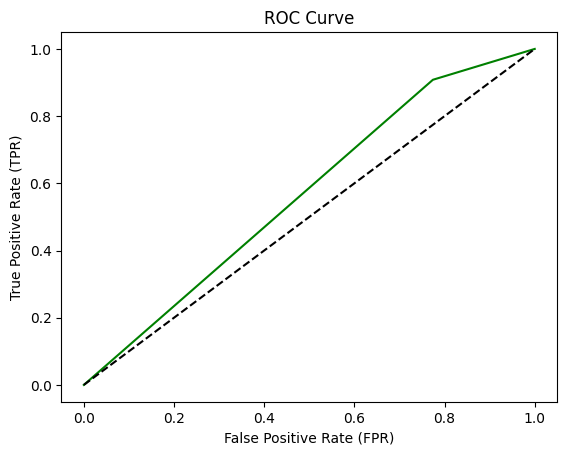

In [55]:
# Decision Trees Classifier
tree_pred = tree_model.predict(X_val)
tree_cm = confusion_matrix(y_val, tree_pred)
perf_measures(y_val,tree_pred)
plot_roc(y_val, tree_pred)


In [56]:
#hyperparameter tuning for RandomForestClassifier
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# define models and parameters
model = RandomForestClassifier()
n_estimators = [10, 100, 1000]
max_features = ['sqrt', 'log2']
# define grid search
grid = dict(n_estimators=n_estimators,max_features=max_features)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(explanatory_variable,response_variable)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.724333 using {'max_features': 'sqrt', 'n_estimators': 1000}
0.680000 (0.045534) with: {'max_features': 'sqrt', 'n_estimators': 10}
0.717333 (0.024349) with: {'max_features': 'sqrt', 'n_estimators': 100}
0.724333 (0.029629) with: {'max_features': 'sqrt', 'n_estimators': 1000}
0.686000 (0.033025) with: {'max_features': 'log2', 'n_estimators': 10}
0.714333 (0.025519) with: {'max_features': 'log2', 'n_estimators': 100}
0.724333 (0.026543) with: {'max_features': 'log2', 'n_estimators': 1000}


In [57]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
#initialize model with best parameters
model_rf = RandomForestClassifier(max_features='sqrt', n_estimators = 1000)
model_rf.fit(X_train,y_train)
#print(model_rf.fit)

RandomForestClassifier(n_estimators=1000)

Accuracy: 0.710
Precision: 0.740
Recall: 0.894
F1 Score: 0.810
ROC AUC: 0.597


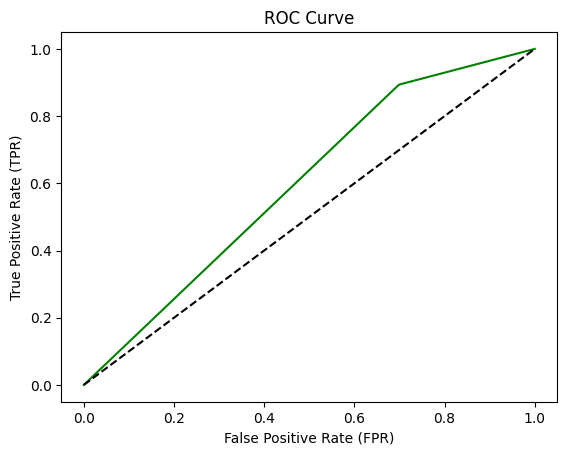

In [58]:
# RandomForest Classfier Trees
rf_pred = model_rf.predict(X_val)
rf_cm = confusion_matrix(y_val, rf_pred)
perf_measures(y_val,rf_pred)
plot_roc(y_val, rf_pred)



The logistic regression gets maximum accuracy at when solver is liblinear and c =0.1. The Decision Tree classification model on credit data and gets maximum accuracy of 71.10 percent at Parameters: {'criterion': 'entropy', 'max_depth': 3, 'max_features': 7, 'min_samples_leaf': 5}. The Random Tree classification model on credit data and gets maximum accuracy of 72.67 percent at Parameters {'max_features': 'sqrt', 'n_estimators': 1000}.

Due to higher accuracy of 72.3 percent among all models and F1 score of 0.825 the logistic regression model has emerged as the one that best predicts risk factors given the features of the credit data. It is the best option for activities involving credit risk assessment due to its capacity for managing complicated relationships and providing precise predictions. Decision tree classifier has 69 percent accuracy and lowest performer in above three models.

It is crucial to keep in mind that choosing the optimal model depends on the particular requirements and limitations of the application. Logistic regression could be an appropriate choice if simplicity and ease of interpretation are your top priorities. Alternately, the Decision Tree Classifier may be taken into account if accurately capturing complex patterns is essential.